# SLRM, Gradient Descent Tutorial
<br>
A **Simple Linear Regression Model** is a statistical method of examining the linear relationship between two variables. 

This tutorial tackles the first assignment in Andrew Ng's Machine Learning course on Coursera, except implemented in Python rather than Octave. We will dive into an introduction to gradient descent and implement simple linear regression, our first machine learning algorithm!

To provide background, within this directory is a file named "ex1data1.txt", which is a set of raw data points seperated by a comma. Suppose you are a restaurant owner and want to know where to expand. The first column refers to the population of different cities you already have restaruants in and the second column refers to profit of that restaruant. 

First thing we're gonna do is import the **pandas**, **numpy** and **matplotlib** libraries.  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

- *Pandas* is a library for data manipulation and analysis. We are going to be using it maining for storing data into DataFrames, aka a table.


- *Numpy* is library used for storing numbers into vectors/matrices. This is important so that we can perform linear algebra operations, (ie. matrix multiplication) on our data. More of this will be discussed when we get to **vectorization.** 


- *Matplotlib* is a library used for visualizing our data through plots.

In [2]:
# pd.read_csv(...) function reads our comma-separated file 
# and returns a DataFrame (table).
df = pd.read_csv('ex1data1.txt', names=['Population','Profit'])

print(df.head(5)) # prints top 5 data points in our DataFrame
print('\n')
print(df.tail(5)) # prints last 5 data points in our DataFrame

   Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233


    Population   Profit
92      5.8707  7.20290
93      5.3054  1.98690
94      8.2934  0.14454
95     13.3940  9.05510
96      5.4369  0.61705


Now that we have an overview of our DataFrame, let's visualize our **training data** (data we are going to base our model off of) in a plot!

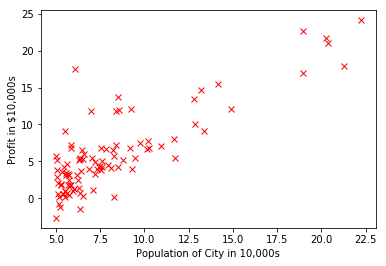

In [3]:
X_axis = df['Population'] # filtering out x_axis data
y_axis = df['Profit']
m = len(y_axis) # number of data points

plt.plot(X_axis, y_axis, 'rx') 
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

plt.show() 
# Note: it is very important to write this line if you want to see
# the resulting plot!

Nice. It seems like the data points lie in a fairly straight line, but how do we find this **line of best fit**? Firstly, recall the equation of a line: 

$$ y = \theta_0 + \theta_1 x$$

We are going to find our line of best fit through the *method of least squares*, which is to find $\theta_0, \theta_1$ values that minimize the sum of squared residuals (the verticle distance between our line and an observed data point). This sum is called the **cost** or **error**. The algorithm we are going to implement in order to solve for these $\theta_0, \theta_1$ values that minimize our error is called **gradient descent**. Let's do that now.

In [4]:
# Firstly, we need to convert our columns into a numpy matrix 
# so that it is possible to do matrix multiplication
X_matrix = df[['Population']].as_matrix() 
X_matrix = np.insert(X_matrix, 0, 1, axis=1) 
X_matrix = np.matrix(X_matrix)
y = df[['Profit']].as_matrix()

Note that a column of 1s was inserted to our X_matrix. This is because we can represent $\theta$ and $x$ as vectors: $$\begin{pmatrix}
x_0\\
x_1 
\end{pmatrix}
~~~~~~~~~~~~\begin{pmatrix}
\theta_0\\
\theta_1 
\end{pmatrix}$$ 
<br>
Thus the equation of a line is then simply the dot product of these vectors, with $\theta_0$ multiplied by $x_0$, which is 1. 


Now to implement the gradient descent algorithm, we need a function to compute the error (cost) for any given $\theta_0, \theta_1$. The equation for this function is given by:
<br><br>
$$ Cost = \frac{1}{2m}\sum_{i = 1}^{m} (\theta^Tx^{(i)} - y^{(i)})^2 = \frac{1}{2m}\sum_{i = 1}^{m} (\theta_0x_0^{(i)} + \theta_1x_1^{(i)} - y^{(i)})^2 \\= \frac{1}{2m}\sum_{i = 1}^{m} (\theta_0 + \theta_1x_1^{(i)} - y^{(i)})^2
$$
<br>
Where $x^{(i)}, y^{(i)}$ represents the respective $i$-th $x,y$ data point (not squared!). Note: $x_0^{(i)}$ is always 1 from the 1s column added earlier. This implemented in the ```computeCost(...)``` function

In [5]:
def computeCost(X, y, theta):
    m = len(y)
    cost = np.sum(np.square(X*theta - y))/(2*m)
    return cost

Note that we didn't use any for loops in order to perform the matrix multiplication for our cost. This is because we used numpy's powerful mathematical functions that did the multiplication for us. This saves the amount of code that needs to be written and is also more efficient than using loops for matrix multiplication performance-wise. This is known as **vectorization**.

Finally, onto the actual gradient descent algorithm. In a nutshell, the gradient represents the slope of steepest ascent at a point in the graph of a function. For example, if you were standing on a hill and you wanted to find the optimal way to reach the top of the hill, the gradient will tell you which direction you should take. 

Now since we want gradient **descent** in order to **minimize** our cost function, we stick a negative sign in front of the gradient when implementing our function. 

![](http://www.holehouse.org/mlclass/01_02_Introduction_regression_analysis_and_gr_files/Image%20[14].png) 
*Pretend you are on a point on this graph and want to reach the bottom. The gradient points to that direction and the gradient's magnitude is the slope in that direction.*  <br><br>


Our function will iteratively fine tune our $\theta_0, \theta_1$ values by using the gradient, until we eventually get to a point where the function converges to the minimum of the cost function (which is what we want!).

The algorithm for gradient descent is for each iteration, change:  
$$ \theta_0 = \theta_0 - \alpha\frac{1}{m}\sum_{i=1}^{m}(\theta_0 + \theta_1x^{(i)} - y^{(i)}) \\ \theta_1 = \theta_1 - \alpha\frac{1}{m}\sum_{i=1}^{m}(\theta_0 + \theta_1x^{(i)} - y^{(i)})~ x^{(i)}) $$

where alpha represents the "learning rate" or how far of a step you want to take in the direction of the gradient. Ie 0.1 is a bigger step than 0.01.

In [6]:
theta = np.matrix(np.zeros((2,1))) 
# first initialize theta to be zeros

iterations = 1500
alpha = 0.01

def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros((num_iters,1))
    
    for i in range(num_iters):  
        
        error = X*theta - y
        theta = theta - (alpha/m) * (X.T * error)
        # Note the use of vectorization again
        
        J_history[[i]] = computeCost(X,y,theta)
        # To see value of cost at each iteration
    
    return [theta, J_history]

result = gradientDescent(X_matrix,y,theta,alpha,iterations)
theta = result[0]
J_history = result[1]

print('theta: ')
print(theta)
print('\n J_history:')
print(J_history)

theta: 
[[-3.63029144]
 [ 1.16636235]]

 J_history:
[[ 6.73719046]
 [ 5.93159357]
 [ 5.90115471]
 ..., 
 [ 4.48343473]
 [ 4.48341145]
 [ 4.48338826]]


Great! The gradient descent algorithm returned the optimal $\theta_0, \theta_1$ values (-3.63, 1.17) that gave a final mininmal cost of around 4.483. The final step is to visualize our line on graph so that we can see our hard work and make predictions!

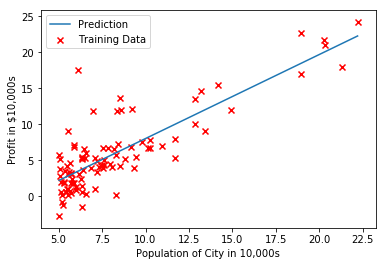

In [7]:
x_line = np.linspace(df.Population.min(), df.Population.max(), 100)
y_line = theta[1,0]*x_line + theta[0,0] # y = theta_1*x + theta_0

plt.plot(x_line, y_line, label="Prediction")
plt.scatter(X_axis , y_axis, color="r", marker='x',label="Training Data")
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend()
plt.show()

This next step is optional but sometimes we want to make sure that our cost function has converged. To see this, we plot the number of iterations our algorithm ran versus the cost value at each iteration and see if the graph reaches a decreasing plateau. 

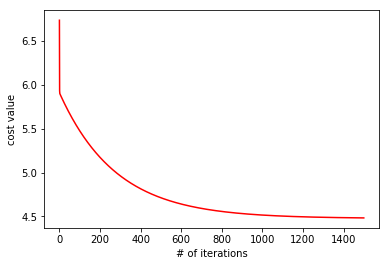

In [8]:
plt.plot(np.arange(iterations), J_history, 'r')
plt.xlabel('# of iterations')
plt.ylabel('cost value')
plt.show()

It seems that the function has converged to its mimimum. Congratulations on writing your first machine learning algorithm! The next steps are to implement multivariate linear regression, when there are more than two variables in the dataset. See you until then :)